In [2]:
from utils import *

# Clasificarea imaginilor cu si fara filtru sepia - RNA

### Pasul 1 - incarcarea datelor si afisarea distributiei lor

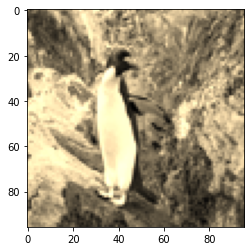

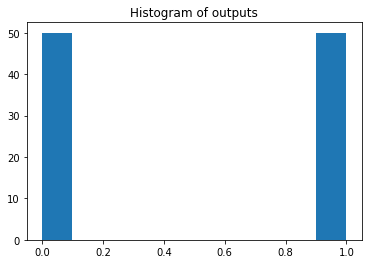

In [3]:
# creeaza un input de 100 de imagini, din care 50 au filtrul sepia
inputs, real_outputs = load_sepia()
import matplotlib.pyplot as plt
plt.imshow(inputs[0])
plt.show()
labeled_outputs = ['sepia' if i == 1 else 'normal' for i in real_outputs]

# afiseaza o histograma a distributiei outputurilor
plot_data_histograms(real_outputs, 'outputs')

### Pasul 2 - Impartirea datelor in date de antrenament si date de validare si normalizarea datelor

In [4]:
# impratirea datelor in date de antrenament si date de validare
train_inputs, train_outputs, validation_inputs, validation_outputs = split_data_into_training_and_validation(inputs, real_outputs, 0.8)

# normalizarea datelor
train_inputs_flattened = [flatten_matrix(train_input) for train_input in train_inputs]
validation_inputs_flattened = [flatten_matrix(validation_input) for validation_input in validation_inputs]
train_inputs_flattened, validation_inputs_flattened = normalisation(train_inputs_flattened, validation_inputs_flattened)

### Pasul 3 - Invatare model

In [5]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(solver='sgd')
classifier = classifier.fit(train_inputs_flattened, train_outputs)

### Pasul 4 - Testarea datelor de validare

In [6]:
predicted_validation_outputs = classifier.predict(validation_inputs_flattened)

### Pasul 5 - Calculul acuratetii si afisarea matricei de confuzie

Accuracy - by tool: 0.75


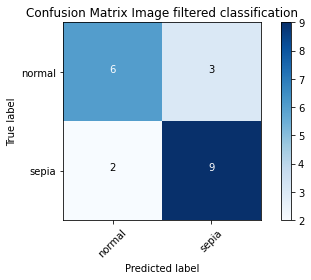

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix

# calculul acuratetii
accuracy = accuracy_score(validation_outputs, predicted_validation_outputs)
print('Accuracy - by tool:', accuracy)

# afisarea matricei de confuzie
cm = confusion_matrix(validation_outputs, predicted_validation_outputs)
plot_confusion_matrix(cm, ['normal', 'sepia'], 'Image filtered classification')